In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UberDataset.csv')

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.shape

(1156, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [7]:
df.fillna('None', inplace= True)

In [8]:
df.sample(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
659,8/15/2016 19:08,8/15/2016 20:30,Business,Unknown Location,Unknown Location,25.9,Temporary Site
949,11-12-2016 15:40,11-12-2016 15:59,Business,Emeryville,Berkeley,3.7,Errand/Supplies
593,7/23/2016 20:17,7/23/2016 20:33,Business,Cary,Durham,10.4,Meeting
442,6/14/2016 17:27,6/14/2016 17:57,Business,Downtown,Bay Farm Island,9.3,Errand/Supplies
724,8/27/2016 11:47,8/27/2016 12:06,Business,Lahore,Lahore,7.0,None
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
535,07-10-2016 16:04,07-10-2016 16:15,Business,St Thomas,CBD,1.8,None
996,11/23/2016 18:37,11/23/2016 18:47,Business,Cary,Cary,1.3,None
457,6/21/2016 15:39,6/21/2016 16:08,Business,Cary,Raleigh,19.3,None
519,07-06-2016 00:33,07-06-2016 00:53,Business,Morrisville,Cary,6.3,Meal/Entertain


In [9]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors= 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors = 'coerce')

In [10]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,None
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1156 non-null   object        
 3   START       1156 non-null   object        
 4   STOP        1156 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [13]:
from datetime import datetime
df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

In [14]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,None,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [15]:
df1 = df.copy()

In [16]:
#changing into categories of day and night
df['day-night'] = pd.cut(x=df['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [17]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,None,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [18]:
df.dropna(inplace= True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   date        413 non-null    object        
 8   time        413 non-null    float64       
 9   day-night   413 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 32.9+ KB


In [20]:
df.drop_duplicates(inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   date        413 non-null    object        
 8   time        413 non-null    float64       
 9   day-night   413 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 32.9+ KB


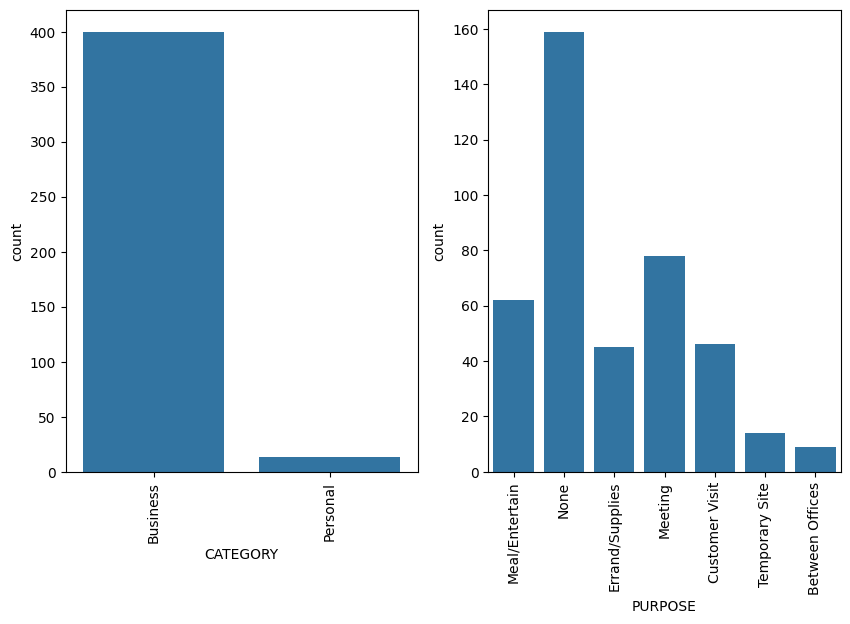

In [22]:
plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
sns.countplot(x= df['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(x= df['PURPOSE'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='day-night', ylabel='count'>

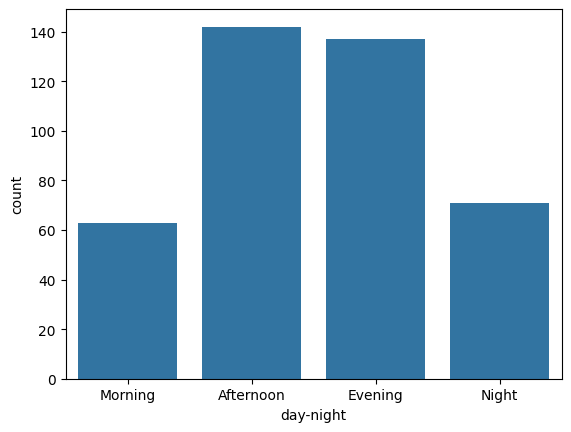

In [23]:
sns.countplot(x= df['day-night'])

In [24]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,None,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [25]:
df['CATEGORY'].value_counts()

CATEGORY
Business    400
Personal     13
Name: count, dtype: int64

In [26]:
df['PURPOSE'].value_counts()

PURPOSE
None               159
Meeting             78
Meal/Entertain      62
Customer Visit      46
Errand/Supplies     45
Temporary Site      14
Between Offices      9
Name: count, dtype: int64

In [27]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
date          0
time          0
day-night     0
dtype: int64

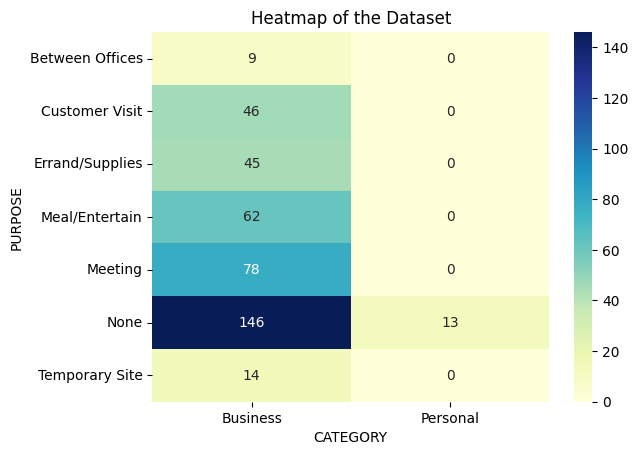

In [28]:
pivot_df = df.pivot_table(columns='CATEGORY', index='PURPOSE', aggfunc='size', fill_value=0)
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of the Dataset')
plt.show()

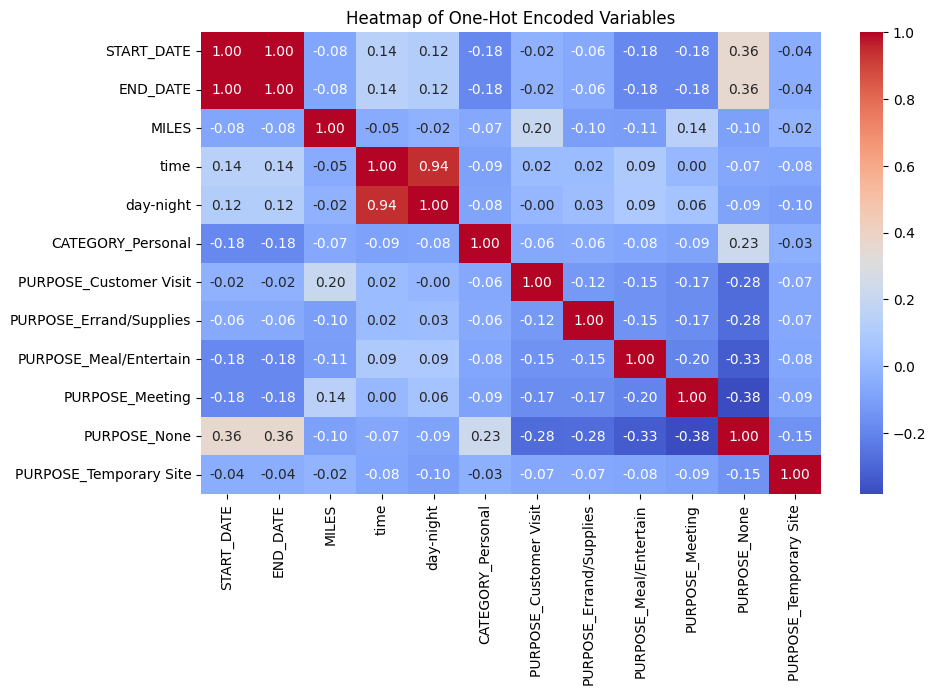

In [29]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['CATEGORY', 'PURPOSE'], drop_first=True)

# Convert 'day-night' to numerical values
day_night_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4}
df_encoded['day-night'] = df_encoded['day-night'].map(day_night_mapping)

# Drop non-numerical columns
df_encoded = df_encoded.drop(columns=['START', 'STOP', 'date'])

# Display Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of One-Hot Encoded Variables')
plt.show()

In [30]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,None,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'MAXIMUM MILES')]

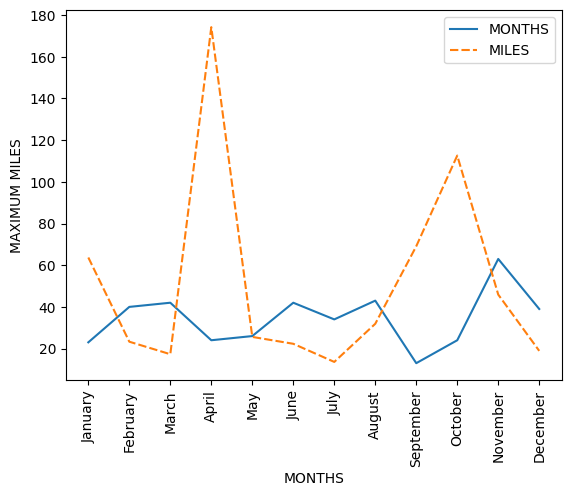

In [31]:
df['Month'] = pd.DatetimeIndex(df['START_DATE']).month
month_label = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['Month'] = df['Month'].map(month_label)

mon = df['Month'].value_counts(sort = False)

dfd = pd.DataFrame({'MONTHS':mon.values, "MILES": df.groupby('Month', sort=False)['MILES'].max()})
p = sns.lineplot(data=dfd)
plt.xticks(rotation=90)
p.set(xlabel="MONTHS", ylabel="MAXIMUM MILES")

In [32]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,None,2016-01-02,1.0,Morning,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,January


In [33]:
pd.DatetimeIndex(df['START_DATE']).month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='START_DATE', length=413)

In [34]:
mon = df['Month'].value_counts(sort=False)
mon

Month
January      23
February     40
March        42
April        24
May          26
June         42
July         34
August       43
September    13
October      24
November     63
December     39
Name: count, dtype: int64

In [35]:
dfd = pd.DataFrame({'MONTHS': mon.values, "MAX MILES": df.groupby('Month', sort=False)['MILES'].max()})
dfd

,MONTHS,MAX MILES
Month,,
January,23,63.7
February,40,23.3
March,42,17.3
April,24,174.2
May,26,25.6
June,42,22.3
July,34,13.6
August,43,31.9
September,13,69.1


In [36]:
df['DAY'] = df.START_DATE.dt.weekday
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['DAY'] = df['DAY'].map(day_label)
categories = ['Mon', 'Tues', 'Wed', 'Thus', 'Fri', 'Sat', 'Sun']
df['DAY'] = pd.Categorical(df['DAY'], categories=categories, ordered=True)
df.DAY.value_counts(sort=False)


DAY
Mon     61
Tues    58
Wed     48
Thus    61
Fri     86
Sat     52
Sun     47
Name: count, dtype: int64

Text(0, 0.5, 'COUNT')

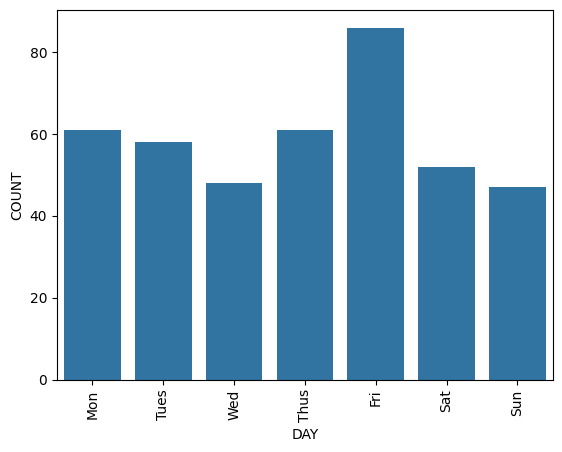

In [37]:
day_label = df.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label)
plt.xticks(rotation=90)
plt.xlabel('DAY')
plt.ylabel('COUNT')  

<Axes: ylabel='MILES'>

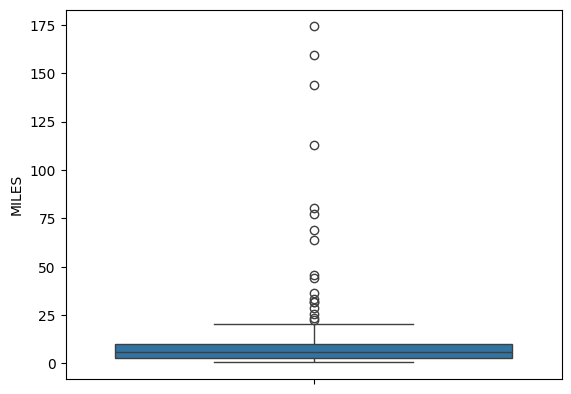

In [38]:
sns.boxplot(df['MILES'])

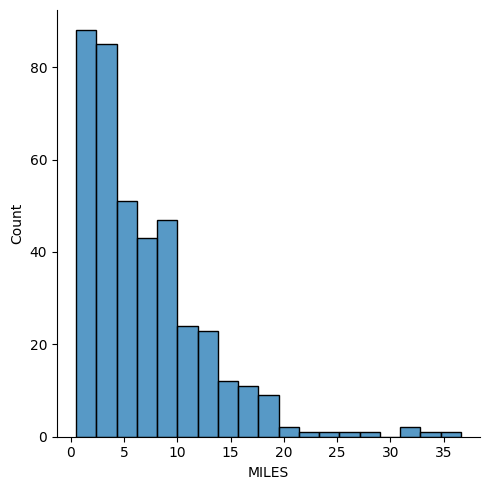

In [39]:
sns.displot(df[df['MILES']<40]['MILES'])